<a href="https://colab.research.google.com/github/wonseokb/Genat4_Study/blob/main/PSD_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea list
1. take data from google drive, so it can use a lot of data files easily
2. regulate the horizontal line, so it can the full right area  
3. take FWHM and rising time, fall time. 10% point, 20% point ect. for other features.

In [1]:
!pip install tqdm
from tqdm import tqdm
import time

import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

# Mount the Google Drive to access files
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


### 1. Read the organized data(You can starts from here)

In [35]:
for i in tqdm(range(10)):
  # Load the array from the .npy file
  C3Sr90_x = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_x.npy')
  C3Sr90_y = np.load('/content/drive/My Drive/autoPSD.Sr90/C3Sr90_y.npy')

  # Multiply each element of C3Sr90_y with 10^9
  C3Sr90_x *= 1e9
  C3Sr90_y *= 1e3

  time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Sr90_x.shape)
print(C3Sr90_y.shape)

100%|██████████| 10/10 [00:24<00:00,  2.46s/it]

(21801, 2122)
(21801, 2122)


In [36]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Cs137_x = np.load('/content/drive/My Drive/autoPSD.Cs137/C3Cs137_x.npy')
    C3Cs137_y = np.load('/content/drive/My Drive/autoPSD.Cs137/C3Cs137_y.npy')

    # Multiply each element of C3Sr90_y with 10^9
    C3Cs137_x *= 1e9
    C3Cs137_y *= 1e3

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Cs137_x.shape)
print(C3Cs137_y.shape)


Progress: 100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


(21801, 2122)
(21801, 2122)


In [10]:
for i in tqdm(range(10), desc="Progress"):
    # Load the array from the .npy file
    C3Bi207_x = np.load('/content/drive/My Drive/autoPSD.Bi207/C3Bi207_x.npy')
    C3Bi207_y = np.load('/content/drive/My Drive/autoPSD.Bi207/C3Bi207_y.npy')

    # Multiply each element of C3Sr90_y with 10^9
    C3Bi207_x *= 1e9
    C3Bi207_y *= 1e3

time.sleep(1)
# Print the shape of the array to verify it is 2D
print(C3Bi207_x.shape)
print(C3Bi207_y.shape)

Progress: 100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


(21801, 2122)
(21801, 2122)


In [24]:
import numpy as np

# Assume that C3Bi207_x and C3Bi207_y are already defined

# Indices of data to remove
remove_indices = [887, 2919]

# Shift the indices of subsequent data forward
shift_indices = [i - len([j for j in remove_indices if j < i]) for i in range(len(C3Bi207_x)) if i not in remove_indices]

# Remove the data at the specified indices
C3Bi207_x = np.delete(C3Bi207_x, remove_indices, axis=0)
C3Bi207_y = np.delete(C3Bi207_y, remove_indices, axis=0)

# Select only the data that wasn't removed and shifted forward
C3Bi207_x = C3Bi207_x[shift_indices]
C3Bi207_y = C3Bi207_y[shift_indices]

# Check the new shapes of the arrays
print(C3Bi207_x.shape)
print(C3Bi207_y.shape)
print(C3Bi207_x[887])
print(C3Bi207_x[2919])

(21795, 2122)
(21795, 2122)
[-9.148 -9.123 -9.098 ... 41.327 41.352 41.352]
[-9.2912 -9.2662 -9.2412 ... 41.184  41.209  41.209 ]


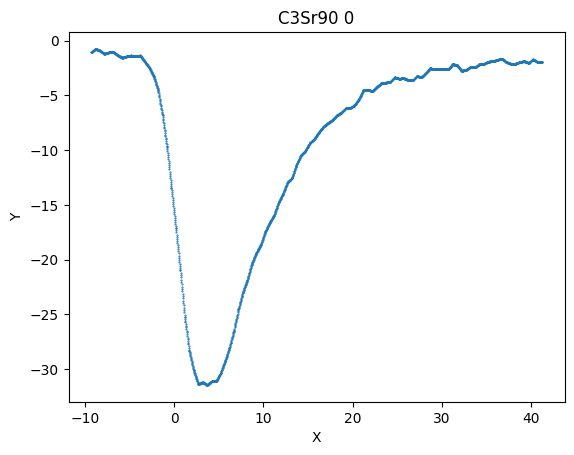

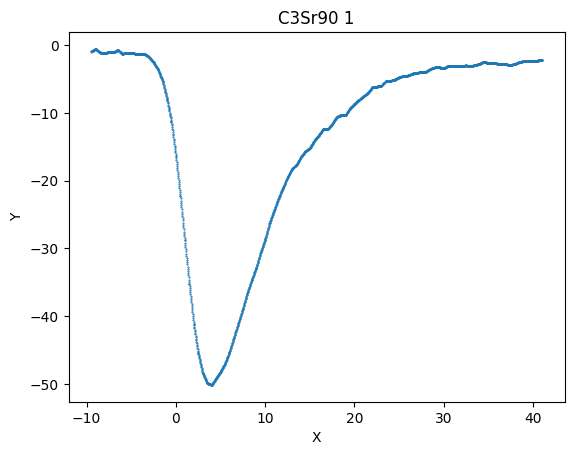

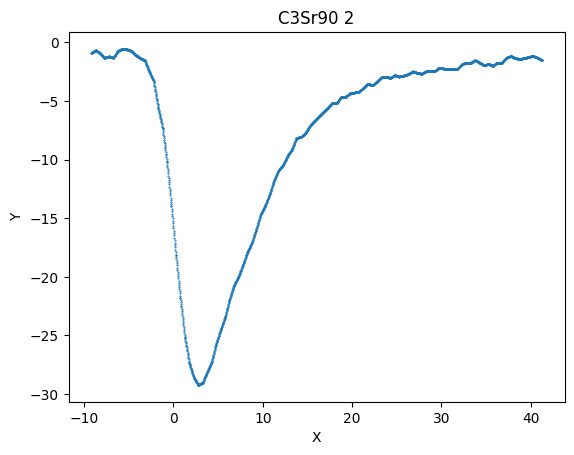

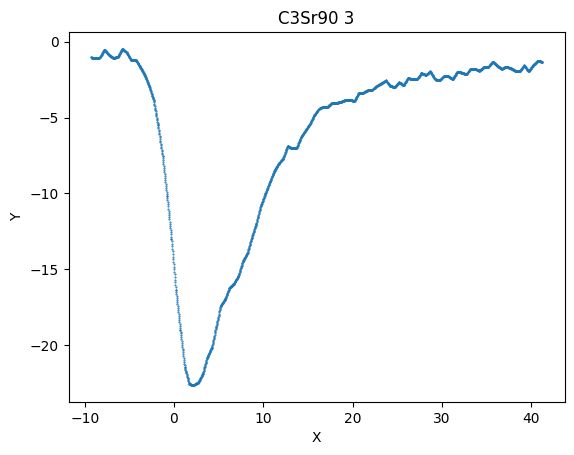

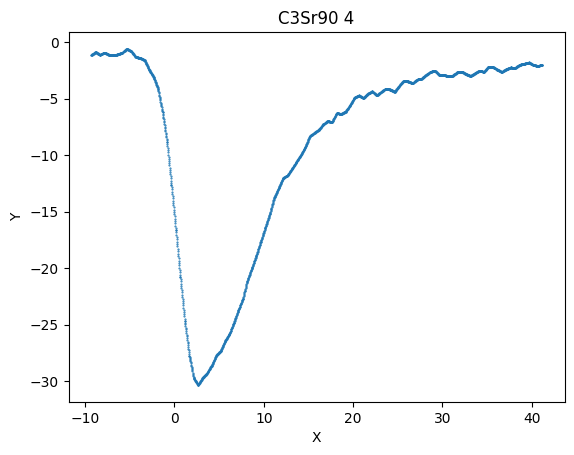

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    plt.show()

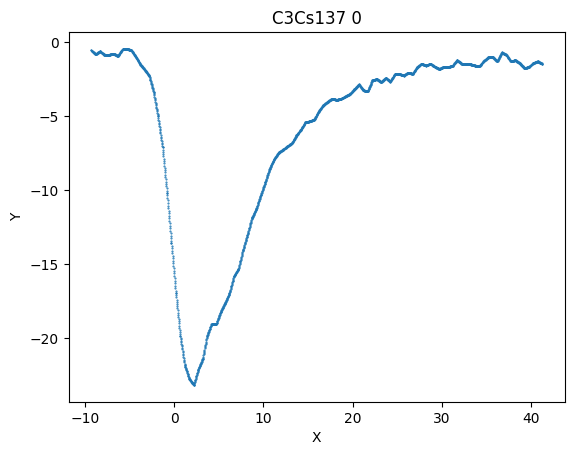

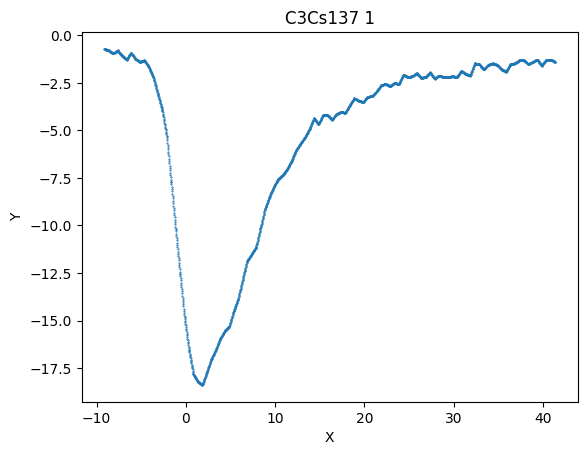

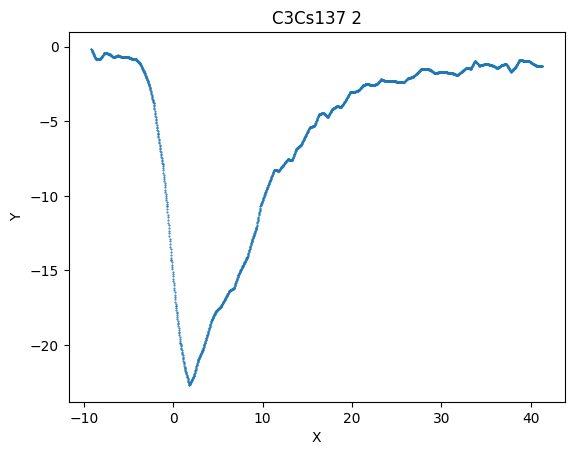

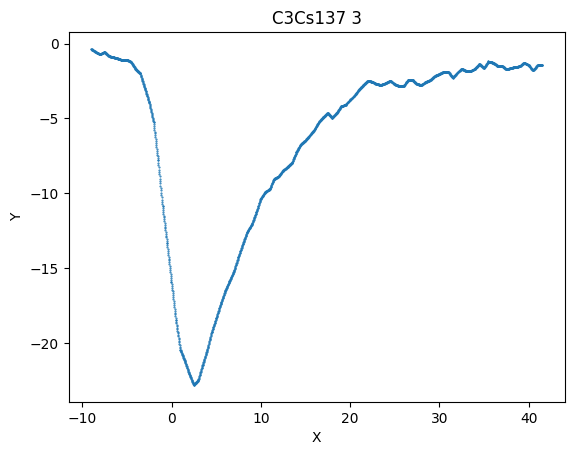

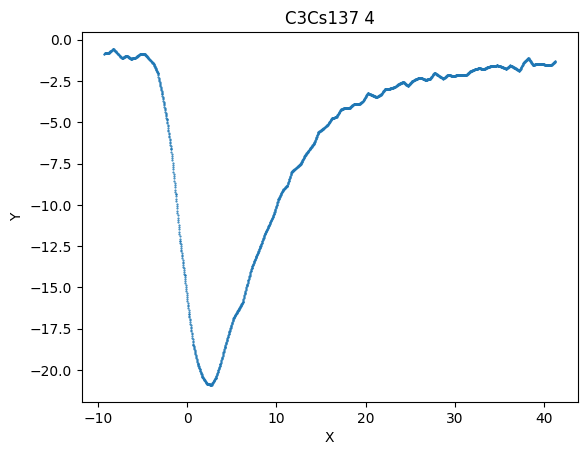

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Cs137_x[i], C3Cs137_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Cs137 ' + str(i + start_num))
    plt.show()

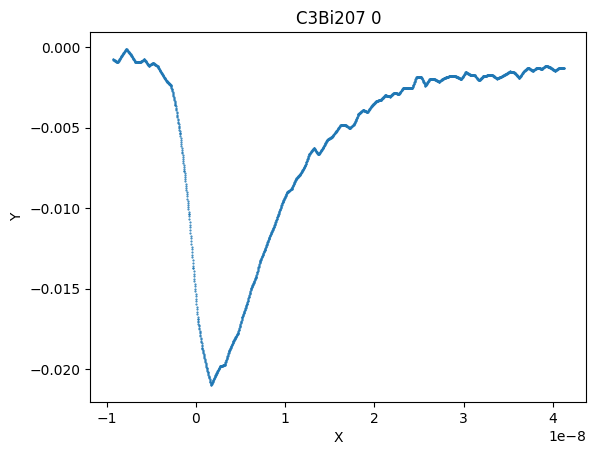

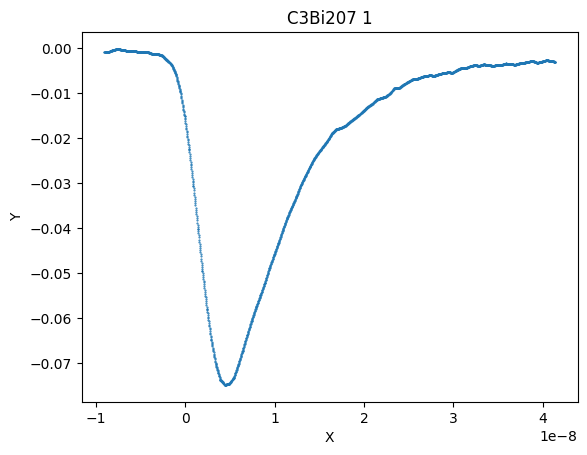

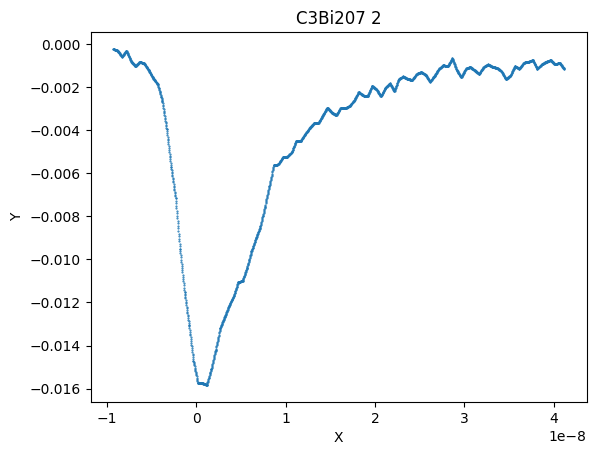

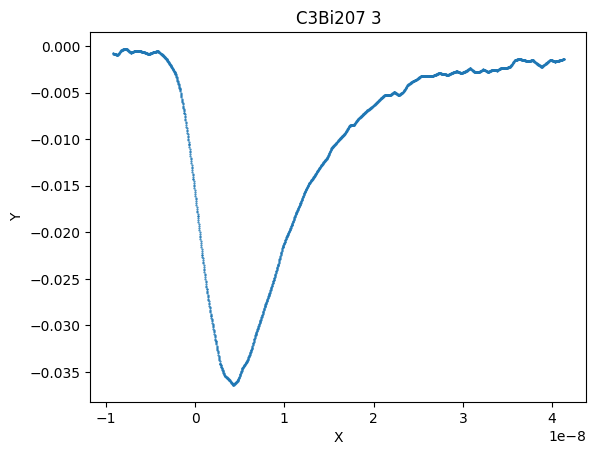

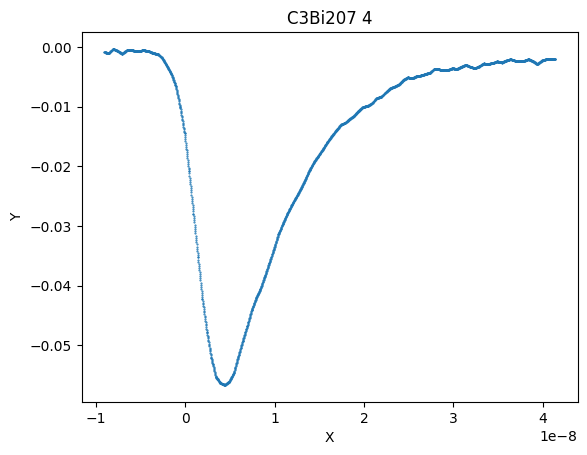

In [ ]:
# Loop through each file and plot the data

num_files = 5
start_num = 0

for i in range(num_files):
    plt.plot(C3Bi207_x[i], C3Bi207_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Bi207 ' + str(i + start_num))
    plt.show()

### 2. Peak Nomarlization and Peak Area Ratio

###2.1. check the logic with small number of data

left_ratio  0.28049
right_ratio  0.71951
peak_height  -1.0


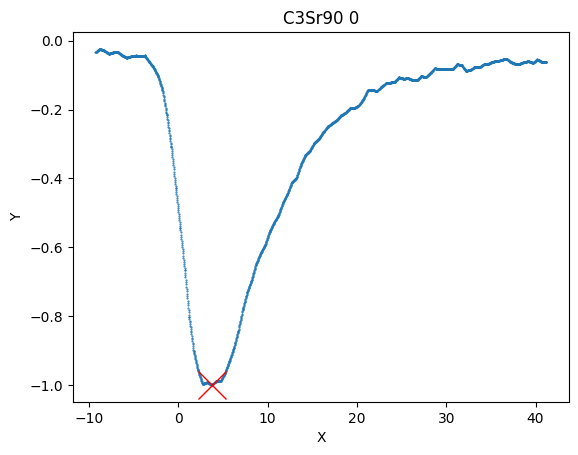

left_ratio  0.2689
right_ratio  0.7311000000000001
peak_height  -1.0


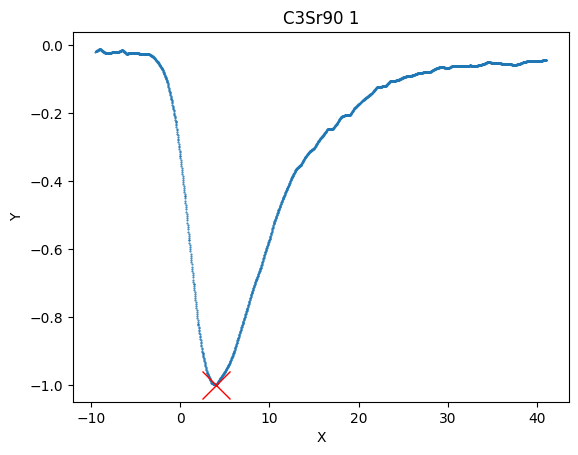

left_ratio  0.24755
right_ratio  0.7524500000000001
peak_height  -1.0


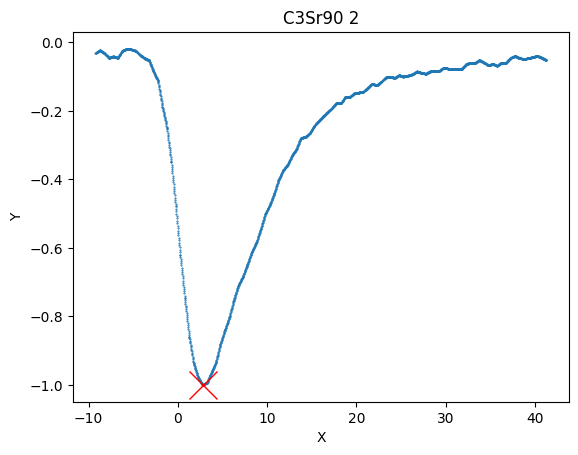

left_ratio  0.23463
right_ratio  0.76537
peak_height  -1.0


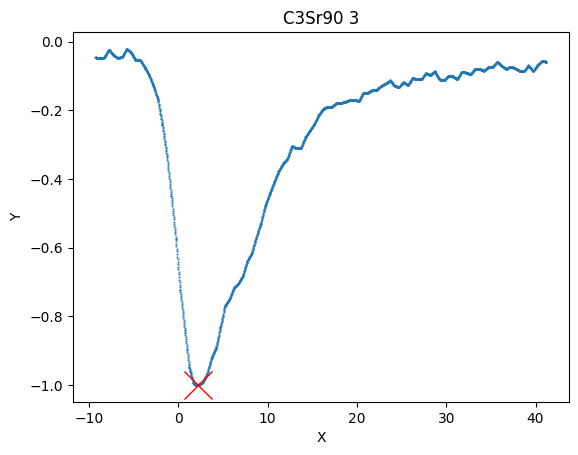

left_ratio  0.21216
right_ratio  0.78784
peak_height  -1.0


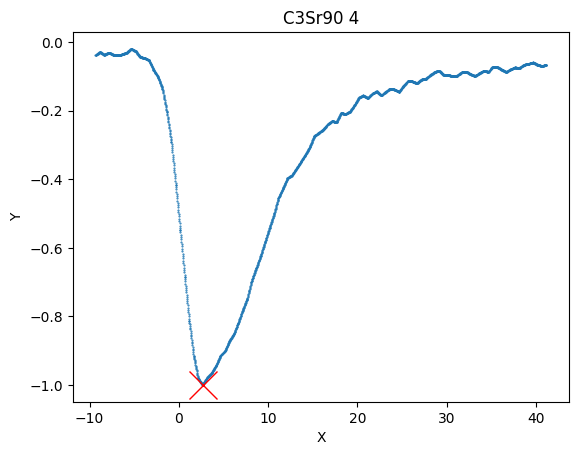

left_ratio  [0.28049 0.2689  0.24755 0.23463 0.21216]
right_ratio  [0.71951 0.7311  0.75245 0.76537 0.78784]
peak_height  [-1. -1. -1. -1. -1.]


In [ ]:
num_files = 5
start_num = 0

# Initialize an empty list to store the left areas
left_ratio_list = []
right_ratio_list = []
peak_height_list = []

for i in range(num_files):
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    # Normalize y values by dividing by minimum value and setting it to 1
    C3Sr90_y[i] = (C3Sr90_y[i] / abs(neg_peak_y))
    
    # Find the minimum y and the corresponding x
    min_y = neg_peak_y
    min_x = neg_peak_x

    # Find the indices of the elements in x that are to the left and right of the peak
    left_indices = C3Sr90_x[i] < min_x
    right_indices = C3Sr90_x[i] > min_x

    # Calculate the areas of the scatter plot to the left and right of the peak using the trapezoidal rule
    left_area = np.trapz(C3Sr90_y[i][left_indices], C3Sr90_x[i][left_indices])
    right_area = np.trapz(C3Sr90_y[i][right_indices], C3Sr90_x[i][right_indices])

    # Calculate the ratio of the left area to the total area and round to 5 decimal places
    left_ratio = round(left_area / (left_area + right_area), 5)

    # Append the left area and peak height to the lists
    left_ratio_list.append(left_ratio)
    peak_height_list.append(min_y)
    right_ratio_list.append(1-left_ratio)
    
    print('left_ratio ', left_ratio)
    print('right_ratio ', 1-left_ratio)
    print('peak_height ', min_y)

    # Add a peak marker at the minimum y and highlight it
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
    plt.plot(min_x, min_y, 'rx', markersize=20, linewidth=100)
    plt.show()

    

# Convert the lists to numpy arrays
left_ratio_array = np.array(left_ratio_list)
right_ratio_array = np.array(right_ratio_list)
peak_height_array = np.array(peak_height_list)

# Print the arrays
print('left_ratio ', left_ratio_array)
print('right_ratio ', right_ratio_array)
print('peak_height ', peak_height_array)

###2.2. Take Data without plot

In [70]:
num_files = 5000 
#num_files = 20000
start_num = 0

# Initialize an empty list to store the left areas
left_ratio_list = []
right_ratio_list = []
peak_height_list = []

for i in range(num_files):
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    # Normalize y values by dividing by minimum value and setting it to 1
    C3Sr90_y[i] = (C3Sr90_y[i] / abs(neg_peak_y))
    
    # Find the minimum y and the corresponding x
    min_y = neg_peak_y
    min_x = neg_peak_x

    # Find the indices of the elements in x that are to the left and right of the peak
    left_indices = C3Sr90_x[i] < min_x
    right_indices = C3Sr90_x[i] > min_x

    # Calculate the areas of the scatter plot to the left and right of the peak using the trapezoidal rule
    left_area = np.trapz(C3Sr90_y[i][left_indices], C3Sr90_x[i][left_indices])
    right_area = np.trapz(C3Sr90_y[i][right_indices], C3Sr90_x[i][right_indices])

    # Calculate the ratio of the left area to the total area and round to 5 decimal places
    left_ratio = round(left_area / (left_area + right_area), 5)

    # Append the left area and peak height to the lists
    left_ratio_list.append(left_ratio)
    peak_height_list.append(min_y)
    right_ratio_list.append(1-left_ratio) 

# Convert the lists to numpy arrays
left_ratio_array = np.array(left_ratio_list)
right_ratio_array = np.array(right_ratio_list)
peak_height_array = np.array(peak_height_list)

# Print the arrays
print('left_ratio ', left_ratio_array)
print('right_ratio ', right_ratio_array)
print('peak_height ', peak_height_array)

left_ratio  [0.28049 0.2689  0.24755 ... 0.25701 0.26218 0.21777]
right_ratio  [0.71951 0.7311  0.75245 ... 0.74299 0.73782 0.78223]
peak_height  [-1. -1. -1. ... -1. -1. -1.]


###3. Find the X%(10%~90%) point from the peak and slope on each point

###3.1. check the logic with 1 data 

target_point(x), : -2.3657
slope: -0.07472043888938457
target_point(x), : -1.4157
slope: -0.14853253302153388
target_point(x), : -0.8657170000000001
slope: -0.1909450757739668
target_point(x), : -0.41572000000000003
slope: -0.21776428911137666
target_point(x), : 0.009279999999999993
slope: -0.23485702339728756
target_point(x), : 0.43428
slope: -0.2390895278139317
target_point(x), : 0.809284
slope: -0.22773223171812648
target_point(x), : 1.1842989999999998
slope: -0.20705207850875115
target_point(x), : 1.6843000000000001
slope: -0.16296171776379695
target_point(x), : 27.984
slope: 0.0134338838950587
target_point(x), : 19.108999999999998
slope: 0.016781606360122738
target_point(x), : 15.159
slope: 0.035095999131019934
target_point(x), : 13.184
slope: 0.05323705870082192
target_point(x), : 11.309000000000001
slope: 0.057651487665702945
target_point(x), : 9.5843
slope: 0.06315880316364994
target_point(x), : 8.1593
slope: 0.08406786174512926
target_point(x), : 7.0593
slope: 0.09878932699440

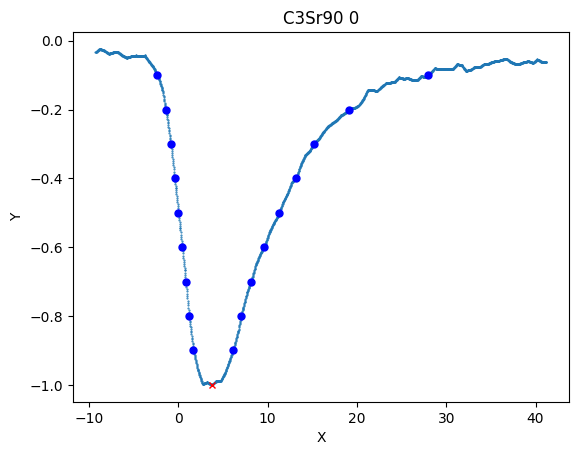

slope_10percent_left_list, [-0.07472043888938457]
slope_20percent_left_list, [-0.14853253302153388]
slope_30percent_left_list, [-0.1909450757739668]
slope_40percent_left_list, [-0.21776428911137666]
slope_50percent_left_list, [-0.23485702339728756]
slope_60percent_left_list, [-0.2390895278139317]
slope_70percent_left_list, [-0.22773223171812648]
slope_80percent_left_list, [-0.20705207850875115]
slope_90percent_left_list, [-0.16296171776379695]
slope_10percent_right_list, [0.0134338838950587]
slope_20percent_right_list, [0.016781606360122738]
slope_30percent_right_list, [0.035095999131019934]
slope_40percent_right_list, [0.05323705870082192]
slope_50percent_right_list, [0.057651487665702945]
slope_60percent_right_list, [0.06315880316364994]
slope_70percent_right_list, [0.08406786174512926]
slope_80percent_right_list, [0.09878932699440883]
slope_90percent_right_list, [0.08661996060100458]


In [39]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 1
start_num = 0

# Left lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_left_list"] = []
    
# Right lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_right_list"] = []

slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 

               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

#-------------------------------------------------------------------------------------------------------------------------------------------

for i in range(num_files):
    plt.plot(C3Sr90_x[i], C3Sr90_y[i], '.', markersize=1, linewidth=100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('C3Sr90 ' + str(i + start_num))
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        # max_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * percent
        max_y = neg_peak_y * percent
        max_indices = np.where(C3Sr90_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Sr90_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Sr90_y[i])]
        x1 = C3Sr90_x[i][np.max(left_indices)]
        x2 = C3Sr90_x[i][np.min(right_indices)]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    # # Mark negative peak with red circle
    plt.plot(neg_peak_x, neg_peak_y, 'x', markersize=5, color='red')
    plt.plot(max_10percent_x1, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_10percent_x2, max_10percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x1, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_20percent_x2, max_20percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x1, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_30percent_x2, max_30percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x1, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_40percent_x2, max_40percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x1, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_50percent_x2, max_50percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x1, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_60percent_x2, max_60percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x1, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_70percent_x2, max_70percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x1, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_80percent_x2, max_80percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x1, max_90percent_y, 'o', markersize=5, color='blue')
    plt.plot(max_90percent_x2, max_90percent_y, 'o', markersize=5, color='blue')

    #--------------------------------------------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 61


    target_points = [max_10percent_x1, max_20percent_x1, max_30percent_x1,
                    max_40percent_x1, max_50percent_x1, max_60percent_x1,
                    max_70percent_x1, max_80percent_x1, max_90percent_x1,
                     
                    max_10percent_x2, max_20percent_x2, max_30percent_x2,
                    max_40percent_x2, max_50percent_x2, max_60percent_x2,
                    max_70percent_x2, max_80percent_x2, max_90percent_x2] 
                     

    for target_point in target_points:
        print('target_point(x), :', target_point)
        # Find the index of the target point
        target_index = np.where(C3Sr90_x[i] == target_point)[0][0]

        # Select the subset of data points around the target point
        start_index = max(0, target_index - window_size)
        end_index = min(len(C3Sr90_x[i]), target_index + window_size)
        x_subset = C3Sr90_x[i][start_index:end_index]
        y_subset = C3Sr90_y[i][start_index:end_index]

        # Fit a linear regression model to the subset of data points
        coeffs = np.polyfit(x_subset, y_subset, 1)

        # The slope of the regression line is the gradient at the target point
        slope = coeffs[0]
        
        # Store the slope in the corresponding slope list
        slope_list_index = target_points.index(target_point)
        slope_lists[slope_list_index].append(slope)
        print('slope:', slope)

    
    # Show plot
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------

for i in range(0, len(slope_lists)):
    if i < 9:
      print(f'slope_{(i+1)*10}percent_left_list, {slope_lists[i]}')
    else:  
      print(f'slope_{(i+1-9)*10}percent_right_list, {slope_lists[i]}')

###3.2. Take data without plot

In [71]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 5000 
#num_files = 20000 
#2180
start_num = 0

# Left lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_left_list"] = []
    
# Right lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_right_list"] = []

slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 

               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

#-------------------------------------------------------------------------------------------------------------------------------------------

for i in range(num_files):
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Sr90_y[i])
    neg_peak_x = C3Sr90_x[i][np.argmin(C3Sr90_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        # max_y = neg_peak_y + (np.max(C3Sr90_y[i]) - neg_peak_y) * percent
        max_y = neg_peak_y * percent
        max_indices = np.where(C3Sr90_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Sr90_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Sr90_y[i])]
        x1 = C3Sr90_x[i][np.max(left_indices)]
        x2 = C3Sr90_x[i][np.min(right_indices)]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    #--------------------------------------------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 61


    target_points = [max_10percent_x1, max_20percent_x1, max_30percent_x1,
                    max_40percent_x1, max_50percent_x1, max_60percent_x1,
                    max_70percent_x1, max_80percent_x1, max_90percent_x1,
                     
                    max_10percent_x2, max_20percent_x2, max_30percent_x2,
                    max_40percent_x2, max_50percent_x2, max_60percent_x2,
                    max_70percent_x2, max_80percent_x2, max_90percent_x2] 
                     

    for target_point in target_points:
        #print('target_point(x), :', target_point)
        # Find the index of the target point
        target_index = np.where(C3Sr90_x[i] == target_point)[0][0]

        # Select the subset of data points around the target point
        start_index = max(0, target_index - window_size)
        end_index = min(len(C3Sr90_x[i]), target_index + window_size)
        x_subset = C3Sr90_x[i][start_index:end_index]
        y_subset = C3Sr90_y[i][start_index:end_index]

        # Fit a linear regression model to the subset of data points
        coeffs = np.polyfit(x_subset, y_subset, 1)

        # The slope of the regression line is the gradient at the target point
        slope = coeffs[0]
        
        # Store the slope in the corresponding slope list
        slope_list_index = target_points.index(target_point)
        slope_lists[slope_list_index].append(slope)
        #print('slope:', slope)

    
    # Show plot
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------

for i in range(0, len(slope_lists)):
    if i < 9:
      print(f'slope_{(i+1)*10}percent_left_list, {len(slope_lists[i])}, {slope_lists[i]}')
    else:  
      print(f'slope_{(i+1-9)*10}percent_right_list, {len(slope_lists[i])}, {slope_lists[i]}')

percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]

for p in percentages:
    globals()[f'slope_{p}percent_left'] = np.array(globals()[f'slope_{p}percent_left_list'])
    globals()[f'slope_{p}percent_right'] = np.array(globals()[f'slope_{p}percent_right_list'])

ValueError: ignored

###4. Save the data as a csv file

In [66]:
print(left_ratio_array.shape)
print(right_ratio_array.shape)
print(slope_10percent_left.shape)
print(slope_20percent_left.shape)
print(slope_30percent_left.shape)
print(slope_40percent_left.shape)
print(slope_50percent_left.shape)
print(slope_60percent_left.shape)
print(slope_70percent_left.shape)
print(slope_80percent_left.shape)
print(slope_90percent_left.shape)
print(slope_10percent_right.shape)
print(slope_20percent_right.shape)
print(slope_30percent_right.shape)
print(slope_40percent_right.shape)
print(slope_50percent_right.shape)
print(slope_60percent_right.shape)
print(slope_70percent_right.shape)
print(slope_80percent_right.shape)
print(slope_90percent_right.shape)

(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)


In [67]:
slope_10percent_left_array = np.array(slope_10percent_left)
slope_20percent_left_array = np.array(slope_20percent_left)
slope_30percent_left_array = np.array(slope_30percent_left)
slope_40percent_left_array = np.array(slope_40percent_left)
slope_50percent_left_array = np.array(slope_50percent_left)
slope_60percent_left_array = np.array(slope_60percent_left)
slope_70percent_left_array = np.array(slope_70percent_left)
slope_80percent_left_array = np.array(slope_80percent_left)
slope_90percent_left_array = np.array(slope_90percent_left)

slope_10percent_right_array = np.array(slope_10percent_right)
slope_20percent_right_array = np.array(slope_20percent_right)
slope_30percent_right_array = np.array(slope_30percent_right)
slope_40percent_right_array = np.array(slope_40percent_right)
slope_50percent_right_array = np.array(slope_50percent_right)
slope_60percent_right_array = np.array(slope_60percent_right)
slope_70percent_right_array = np.array(slope_70percent_right)
slope_80percent_right_array = np.array(slope_80percent_right)
slope_90percent_right_array = np.array(slope_90percent_right)

In [68]:
import numpy as np

# Define column names
left_cols = ['left_ratio', 'slope_10_left', 'slope_20_left', 'slope_30_left', 'slope_40_left', 'slope_50_left', 'slope_60_left', 'slope_70_left', 'slope_80_left', 'slope_90_left']
right_cols = ['right_ratio', 'slope_10_right', 'slope_20_right', 'slope_30_right', 'slope_40_right', 'slope_50_right', 'slope_60_right', 'slope_70_right', 'slope_80_right', 'slope_90_right']

# Stack arrays horizontally with column names
left_arrays = [left_ratio_array, slope_10percent_left_array, slope_20percent_left_array, slope_30percent_left_array, slope_40percent_left_array, slope_50percent_left_array, slope_60percent_left_array, slope_70percent_left_array, slope_80percent_left_array, slope_90percent_left_array]
right_arrays = [right_ratio_array, slope_10percent_right_array, slope_20percent_right_array, slope_30percent_right_array, slope_40percent_right_array, slope_50percent_right_array, slope_60percent_right_array, slope_70percent_right_array, slope_80percent_right_array, slope_90percent_right_array]
data_array = np.column_stack((left_arrays + right_arrays)).astype(float)

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Convert data_array to a pandas DataFrame
df = pd.DataFrame(data_array, columns=left_cols + right_cols)

# Save the DataFrame as a CSV file in your Google Drive
file_path = '/content/drive/MyDrive/autoPSD.Sr90/data_array_Sr90_5000.csv'
df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###for Cs137

In [54]:
num_files = 5000
start_num = 0

# Initialize an empty list to store the left areas
left_ratio_list = []
right_ratio_list = []
peak_height_list = []

for i in range(num_files):
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Cs137_y[i])
    neg_peak_x = C3Cs137_x[i][np.argmin(C3Cs137_y[i])]

    # Normalize y values by dividing by minimum value and setting it to 1
    C3Cs137_y[i] = (C3Cs137_y[i] / abs(neg_peak_y))
    
    # Find the minimum y and the corresponding x
    min_y = neg_peak_y
    min_x = neg_peak_x

    # Find the indices of the elements in x that are to the left and right of the peak
    left_indices = C3Cs137_x[i] < min_x
    right_indices = C3Cs137_x[i] > min_x

    # Calculate the areas of the scatter plot to the left and right of the peak using the trapezoidal rule
    left_area = np.trapz(C3Cs137_y[i][left_indices], C3Cs137_x[i][left_indices])
    right_area = np.trapz(C3Cs137_y[i][right_indices], C3Cs137_x[i][right_indices])

    # Calculate the ratio of the left area to the total area and round to 5 decimal places
    left_ratio = round(left_area / (left_area + right_area), 5)

    # Append the left area and peak height to the lists
    left_ratio_list.append(left_ratio)
    peak_height_list.append(min_y)
    right_ratio_list.append(1-left_ratio) 

# Convert the lists to numpy arrays
left_ratio_array = np.array(left_ratio_list)
right_ratio_array = np.array(right_ratio_list)
peak_height_array = np.array(peak_height_list)

# Print the arrays
print('left_ratio ', left_ratio_array)
print('right_ratio ', right_ratio_array)
print('peak_height ', peak_height_array)


left_ratio  [0.24382 0.24848 0.20828 ... 0.26412 0.2679  0.25032]
right_ratio  [0.75618 0.75152 0.79172 ... 0.73588 0.7321  0.74968]
peak_height  [-1. -1. -1. ... -1. -1. -1.]


In [55]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 5000 
#2180
start_num = 0

# Left lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_left_list"] = []
    
# Right lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_right_list"] = []

slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 

               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

#-------------------------------------------------------------------------------------------------------------------------------------------

for i in range(num_files):
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Cs137_y[i])
    neg_peak_x = C3Cs137_x[i][np.argmin(C3Cs137_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        # max_y = neg_peak_y + (np.max(C3Cs137_y[i]) - neg_peak_y) * percent
        max_y = neg_peak_y * percent
        max_indices = np.where(C3Cs137_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Cs137_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Cs137_y[i])]
        x1 = C3Cs137_x[i][np.max(left_indices)]
        x2 = C3Cs137_x[i][np.min(right_indices)]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    #--------------------------------------------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 61


    target_points = [max_10percent_x1, max_20percent_x1, max_30percent_x1,
                    max_40percent_x1, max_50percent_x1, max_60percent_x1,
                    max_70percent_x1, max_80percent_x1, max_90percent_x1,
                     
                    max_10percent_x2, max_20percent_x2, max_30percent_x2,
                    max_40percent_x2, max_50percent_x2, max_60percent_x2,
                    max_70percent_x2, max_80percent_x2, max_90percent_x2] 
                     

    for target_point in target_points:
        #print('target_point(x), :', target_point)
        # Find the index of the target point
        target_index = np.where(C3Cs137_x[i] == target_point)[0][0]

        # Select the subset of data points around the target point
        start_index = max(0, target_index - window_size)
        end_index = min(len(C3Cs137_x[i]), target_index + window_size)
        x_subset = C3Cs137_x[i][start_index:end_index]
        y_subset = C3Cs137_y[i][start_index:end_index]

        # Fit a linear regression model to the subset of data points
        coeffs = np.polyfit(x_subset, y_subset, 1)

        # The slope of the regression line is the gradient at the target point
        slope = coeffs[0]
        
        # Store the slope in the corresponding slope list
        slope_list_index = target_points.index(target_point)
        slope_lists[slope_list_index].append(slope)
        #print('slope:', slope)

    
    # Show plot
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------

for i in range(0, len(slope_lists)):
    if i < 9:
      print(f'slope_{(i+1)*10}percent_left_list, {len(slope_lists[i])}, {slope_lists[i]}')
    else:  
      print(f'slope_{(i+1-9)*10}percent_right_list, {len(slope_lists[i])}, {slope_lists[i]}')

percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]

for p in percentages:
    globals()[f'slope_{p}percent_left'] = np.array(globals()[f'slope_{p}percent_left_list'])
    globals()[f'slope_{p}percent_right'] = np.array(globals()[f'slope_{p}percent_right_list'])

slope_10percent_left_list, 5000, [-0.07777596985503189, -0.05304464571489678, -0.08755751706149414, -0.06388322843574402, -0.08791706224068378, -0.08860332450928741, -0.0711339879339346, -0.0882280147403743, -0.05188817257317851, -0.0743941761901271, -0.08668295354450385, -0.08282875225565808, -0.08029338718963445, -0.07216224772679339, -0.0800120055509195, -0.09015028374014689, -0.08490809112372875, -0.06677731509842953, -0.06565239494849873, -0.06282676545959488, -0.06295340613250298, -0.04698265922520829, -0.07501455458527478, -0.08564842187220476, -0.07763533384232703, -0.0917164595856413, -0.060982796102435684, -0.0687182791967154, -0.07886640498450938, -0.09016741449259978, -0.06160670792440608, -0.08322468675816855, -0.09499421640922577, -0.0734274997928929, -0.09076164351814116, -0.093652002484165, -0.08351986923660877, -0.07555241336215422, -0.10228032074114217, -0.07210470378539512, -0.06942368995799991, -0.0837963631157827, -0.06587442764587469, -0.08319144750563567, -0.0860

In [56]:
print(left_ratio_array.shape)
print(right_ratio_array.shape)
print(slope_10percent_left.shape)
print(slope_20percent_left.shape)
print(slope_30percent_left.shape)
print(slope_40percent_left.shape)
print(slope_50percent_left.shape)
print(slope_60percent_left.shape)
print(slope_70percent_left.shape)
print(slope_80percent_left.shape)
print(slope_90percent_left.shape)
print(slope_10percent_right.shape)
print(slope_20percent_right.shape)
print(slope_30percent_right.shape)
print(slope_40percent_right.shape)
print(slope_50percent_right.shape)
print(slope_60percent_right.shape)
print(slope_70percent_right.shape)
print(slope_80percent_right.shape)
print(slope_90percent_right.shape)

(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)


In [57]:
slope_10percent_left_array = np.array(slope_10percent_left)
slope_20percent_left_array = np.array(slope_20percent_left)
slope_30percent_left_array = np.array(slope_30percent_left)
slope_40percent_left_array = np.array(slope_40percent_left)
slope_50percent_left_array = np.array(slope_50percent_left)
slope_60percent_left_array = np.array(slope_60percent_left)
slope_70percent_left_array = np.array(slope_70percent_left)
slope_80percent_left_array = np.array(slope_80percent_left)
slope_90percent_left_array = np.array(slope_90percent_left)

slope_10percent_right_array = np.array(slope_10percent_right)
slope_20percent_right_array = np.array(slope_20percent_right)
slope_30percent_right_array = np.array(slope_30percent_right)
slope_40percent_right_array = np.array(slope_40percent_right)
slope_50percent_right_array = np.array(slope_50percent_right)
slope_60percent_right_array = np.array(slope_60percent_right)
slope_70percent_right_array = np.array(slope_70percent_right)
slope_80percent_right_array = np.array(slope_80percent_right)
slope_90percent_right_array = np.array(slope_90percent_right)

In [58]:
import numpy as np

# Define column names
left_cols = ['left_ratio', 'slope_10_left', 'slope_20_left', 'slope_30_left', 'slope_40_left', 'slope_50_left', 'slope_60_left', 'slope_70_left', 'slope_80_left', 'slope_90_left']
right_cols = ['right_ratio', 'slope_10_right', 'slope_20_right', 'slope_30_right', 'slope_40_right', 'slope_50_right', 'slope_60_right', 'slope_70_right', 'slope_80_right', 'slope_90_right']

# Stack arrays horizontally with column names
left_arrays = [left_ratio_array, slope_10percent_left_array, slope_20percent_left_array, slope_30percent_left_array, slope_40percent_left_array, slope_50percent_left_array, slope_60percent_left_array, slope_70percent_left_array, slope_80percent_left_array, slope_90percent_left_array]
right_arrays = [right_ratio_array, slope_10percent_right_array, slope_20percent_right_array, slope_30percent_right_array, slope_40percent_right_array, slope_50percent_right_array, slope_60percent_right_array, slope_70percent_right_array, slope_80percent_right_array, slope_90percent_right_array]
data_array = np.column_stack((left_arrays + right_arrays)).astype(float)

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Convert data_array to a pandas DataFrame
df = pd.DataFrame(data_array, columns=left_cols + right_cols)

# Save the DataFrame as a CSV file in your Google Drive
file_path = '/content/drive/MyDrive/autoPSD.Cs137/data_array_Cs137_5000.csv'
df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###for Bi207

In [59]:
num_files = 5000
start_num = 0

# Initialize an empty list to store the left areas
left_ratio_list = []
right_ratio_list = []
peak_height_list = []

for i in range(num_files):
    
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Bi207_y[i])
    neg_peak_x = C3Bi207_x[i][np.argmin(C3Bi207_y[i])]

    # Normalize y values by dividing by minimum value and setting it to 1
    C3Bi207_y[i] = (C3Bi207_y[i] / abs(neg_peak_y))
    
    # Find the minimum y and the corresponding x
    min_y = neg_peak_y
    min_x = neg_peak_x

    # Find the indices of the elements in x that are to the left and right of the peak
    left_indices = C3Bi207_x[i] < min_x
    right_indices = C3Bi207_x[i] > min_x

    # Calculate the areas of the scatter plot to the left and right of the peak using the trapezoidal rule
    left_area = np.trapz(C3Bi207_y[i][left_indices], C3Bi207_x[i][left_indices])
    right_area = np.trapz(C3Bi207_y[i][right_indices], C3Bi207_x[i][right_indices])

    # Calculate the ratio of the left area to the total area and round to 5 decimal places
    left_ratio = round(left_area / (left_area + right_area), 5)

    # Append the left area and peak height to the lists
    left_ratio_list.append(left_ratio)
    peak_height_list.append(min_y)
    right_ratio_list.append(1-left_ratio) 

# Convert the lists to numpy arrays
left_ratio_array = np.array(left_ratio_list)
right_ratio_array = np.array(right_ratio_list)
peak_height_array = np.array(peak_height_list)

# Print the arrays
print('left_ratio ', left_ratio_array)
print('right_ratio ', right_ratio_array)
print('peak_height ', peak_height_array)


left_ratio  [0.20814 0.25342 0.27987 ... 0.27177 0.27608 0.23962]
right_ratio  [0.79186 0.74658 0.72013 ... 0.72823 0.72392 0.76038]
peak_height  [-1. -1. -1. ... -1. -1. -1.]


In [60]:
import numpy as np
import matplotlib.pyplot as plt

num_files = 5000 
#2180
start_num = 0

# Left lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_left_list"] = []
    
# Right lists
for i in range(1, 10):
    globals()[f"slope_{i}0percent_right_list"] = []

slope_lists = [slope_10percent_left_list, slope_20percent_left_list, slope_30percent_left_list, 
               slope_40percent_left_list, slope_50percent_left_list, slope_60percent_left_list, 
               slope_70percent_left_list, slope_80percent_left_list, slope_90percent_left_list, 

               slope_10percent_right_list, slope_20percent_right_list, slope_30percent_right_list,
               slope_40percent_right_list, slope_50percent_right_list, slope_60percent_right_list, 
               slope_70percent_right_list, slope_80percent_right_list, slope_90percent_right_list]

#-------------------------------------------------------------------------------------------------------------------------------------------

for i in range(num_files):
  
    # Find negative peak and corresponding x
    neg_peak_y = np.min(C3Bi207_y[i])
    neg_peak_x = C3Bi207_x[i][np.argmin(C3Bi207_y[i])]

    percentage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    for percent in percentage_values:
        # max_y = neg_peak_y + (np.max(C3Bi207_y[i]) - neg_peak_y) * percent
        max_y = neg_peak_y * percent
        max_indices = np.where(C3Bi207_y[i] >= max_y)[0]
        left_indices = max_indices[max_indices < np.argmin(C3Bi207_y[i])]
        right_indices = max_indices[max_indices > np.argmin(C3Bi207_y[i])]
        x1 = C3Bi207_x[i][np.max(left_indices)]
        x2 = C3Bi207_x[i][np.min(right_indices)]
        
        var_name = f"max_{percent*100:.0f}percent"
        globals()[var_name + "_y"] = max_y
        globals()[var_name + "_x1"] = x1
        globals()[var_name + "_x2"] = x2
        globals()[var_name + "_indices"] = max_indices

    #--------------------------------------------------------------------------------------------------------------------------------

    # Define a window size for selecting nearby points
    window_size = 61


    target_points = [max_10percent_x1, max_20percent_x1, max_30percent_x1,
                    max_40percent_x1, max_50percent_x1, max_60percent_x1,
                    max_70percent_x1, max_80percent_x1, max_90percent_x1,
                     
                    max_10percent_x2, max_20percent_x2, max_30percent_x2,
                    max_40percent_x2, max_50percent_x2, max_60percent_x2,
                    max_70percent_x2, max_80percent_x2, max_90percent_x2] 
                     

    for target_point in target_points:
        #print('target_point(x), :', target_point)
        # Find the index of the target point
        target_index = np.where(C3Bi207_x[i] == target_point)[0][0]

        # Select the subset of data points around the target point
        start_index = max(0, target_index - window_size)
        end_index = min(len(C3Bi207_x[i]), target_index + window_size)
        x_subset = C3Bi207_x[i][start_index:end_index]
        y_subset = C3Bi207_y[i][start_index:end_index]

        # Fit a linear regression model to the subset of data points
        coeffs = np.polyfit(x_subset, y_subset, 1)

        # The slope of the regression line is the gradient at the target point
        slope = coeffs[0]
        
        # Store the slope in the corresponding slope list
        slope_list_index = target_points.index(target_point)
        slope_lists[slope_list_index].append(slope)
        #print('slope:', slope)

    
    # Show plot
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------

for i in range(0, len(slope_lists)):
    if i < 9:
      print(f'slope_{(i+1)*10}percent_left_list, {len(slope_lists[i])}, {slope_lists[i]}')
    else:  
      print(f'slope_{(i+1-9)*10}percent_right_list, {len(slope_lists[i])}, {slope_lists[i]}')

percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]

for p in percentages:
    globals()[f'slope_{p}percent_left'] = np.array(globals()[f'slope_{p}percent_left_list'])
    globals()[f'slope_{p}percent_right'] = np.array(globals()[f'slope_{p}percent_right_list'])

slope_10percent_left_list, 5000, [-0.05637555027594252, -0.1022438005498449, -0.05454089145973351, -0.0933467247908428, -0.08816313245818884, -0.07468395168590371, -0.05982858142828919, -0.09126679818215615, -0.061489894661976116, -0.07195027546463008, -0.09309391436587774, -0.08438532535610498, -0.08834643874034874, -0.09901780296603534, -0.08501163765929678, -0.08084207227286488, -0.04769012642167505, -0.09091820148157843, -0.06258919244436972, -0.09427838041746933, -0.09276739868087135, -0.053689576015362554, -0.10075691199206772, -0.07020213665981882, -0.09350673970272426, -0.07795608769564127, -0.09567565027786339, -0.0788424345510703, -0.08824946524607126, -0.0871309136006605, -0.08962446472173816, -0.0710440414767774, -0.06493820223026363, -0.08264754511907939, -0.0882444555885204, -0.05566830894562243, -0.09556004386820227, -0.09060365246954466, -0.09840283051425842, -0.09433353393695497, -0.04907402040846631, -0.07650905832093778, -0.056726355527875756, -0.062381960151378375, 

In [61]:
print(left_ratio_array.shape)
print(right_ratio_array.shape)
print(slope_10percent_left.shape)
print(slope_20percent_left.shape)
print(slope_30percent_left.shape)
print(slope_40percent_left.shape)
print(slope_50percent_left.shape)
print(slope_60percent_left.shape)
print(slope_70percent_left.shape)
print(slope_80percent_left.shape)
print(slope_90percent_left.shape)
print(slope_10percent_right.shape)
print(slope_20percent_right.shape)
print(slope_30percent_right.shape)
print(slope_40percent_right.shape)
print(slope_50percent_right.shape)
print(slope_60percent_right.shape)
print(slope_70percent_right.shape)
print(slope_80percent_right.shape)
print(slope_90percent_right.shape)

(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)
(5000,)


In [62]:
slope_10percent_left_array = np.array(slope_10percent_left)
slope_20percent_left_array = np.array(slope_20percent_left)
slope_30percent_left_array = np.array(slope_30percent_left)
slope_40percent_left_array = np.array(slope_40percent_left)
slope_50percent_left_array = np.array(slope_50percent_left)
slope_60percent_left_array = np.array(slope_60percent_left)
slope_70percent_left_array = np.array(slope_70percent_left)
slope_80percent_left_array = np.array(slope_80percent_left)
slope_90percent_left_array = np.array(slope_90percent_left)

slope_10percent_right_array = np.array(slope_10percent_right)
slope_20percent_right_array = np.array(slope_20percent_right)
slope_30percent_right_array = np.array(slope_30percent_right)
slope_40percent_right_array = np.array(slope_40percent_right)
slope_50percent_right_array = np.array(slope_50percent_right)
slope_60percent_right_array = np.array(slope_60percent_right)
slope_70percent_right_array = np.array(slope_70percent_right)
slope_80percent_right_array = np.array(slope_80percent_right)
slope_90percent_right_array = np.array(slope_90percent_right)


In [63]:
import numpy as np

# Define column names
left_cols = ['left_ratio', 'slope_10_left', 'slope_20_left', 'slope_30_left', 'slope_40_left', 'slope_50_left', 'slope_60_left', 'slope_70_left', 'slope_80_left', 'slope_90_left']
right_cols = ['right_ratio', 'slope_10_right', 'slope_20_right', 'slope_30_right', 'slope_40_right', 'slope_50_right', 'slope_60_right', 'slope_70_right', 'slope_80_right', 'slope_90_right']

# Stack arrays horizontally with column names
left_arrays = [left_ratio_array, slope_10percent_left_array, slope_20percent_left_array, slope_30percent_left_array, slope_40percent_left_array, slope_50percent_left_array, slope_60percent_left_array, slope_70percent_left_array, slope_80percent_left_array, slope_90percent_left_array]
right_arrays = [right_ratio_array, slope_10percent_right_array, slope_20percent_right_array, slope_30percent_right_array, slope_40percent_right_array, slope_50percent_right_array, slope_60percent_right_array, slope_70percent_right_array, slope_80percent_right_array, slope_90percent_right_array]
data_array = np.column_stack((left_arrays + right_arrays)).astype(float)

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Convert data_array to a pandas DataFrame
df = pd.DataFrame(data_array, columns=left_cols + right_cols)

# Save the DataFrame as a CSV file in your Google Drive
file_path = '/content/drive/MyDrive/autoPSD.Bi207/data_array_Bi207_5000.csv'
df.to_csv(file_path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
